In [1]:
import cv2
import numpy as np
import os

In [2]:
!ls data/near_dup

wo0001	wo0002	wo5700	wo5701


In [3]:
!ls data/near_dup/wo0001/

wo0001001_1.jpg  wo0001004_1.jpg  wo0001007_1.jpg  wo0001009_2.JPG
wo0001002_1.jpg  wo0001005_1.jpg  wo0001008_1.jpg  wo0001009_3.JPG
wo0001003_1.jpg  wo0001006_1.jpg  wo0001009_1.JPG


In [4]:
!ls data/near_dup/wo0002/

wo0002001_1.jpg  wo0002004_1.jpg  wo0002007_1.jpg  wo0002009_2.jpg
wo0002002_1.jpg  wo0002005_1.jpg  wo0002008_1.jpg  wo0002009_3.jpg
wo0002003_1.jpg  wo0002006_1.jpg  wo0002009_1.jpg


In [5]:
from IPython.display import display, HTML
from IPython.display import Image as IPImage
from math import ceil

def show_images_in(image_folder, images_per_row=4):

    image_files = sorted([f for f in os.listdir(image_folder) if f.lower().endswith(('.png', '.jpg', '.jpeg', '.gif'))])

    # Calculate the number of rows
    num_rows = int(ceil(len(image_files) / images_per_row))

    # Create an HTML string to display the images
    html_str = "<table>"

    for i in range(num_rows):
        html_str += "<tr>"
        for j in range(images_per_row):
            index = i * images_per_row + j
            if index < len(image_files):
                img_path = os.path.join(image_folder, image_files[index])
                # Display the image with filename
                html_str += f"<td><img src='{img_path}'><br>{image_files[index]}</td>"
        html_str += "</tr>"

    html_str += "</table>"

    display(HTML(html_str))

In [6]:
show_images_in("data/near_dup/wo0001")

In [7]:
show_images_in("data/near_dup/wo0002")

In [9]:
def show_matches(image_path1, image_path2, print_distances=True):
    # Load the two images
    img1 = cv2.imread(image_path1, cv2.IMREAD_GRAYSCALE)
    img2 = cv2.imread(image_path2, cv2.IMREAD_GRAYSCALE)

    orb = cv2.ORB_create()

    # Detect ORB keypoints and descriptors for both images
    kp1, des1 = orb.detectAndCompute(img1, None)
    kp2, des2 = orb.detectAndCompute(img2, None)

    # Create a Brute Force Matcher
    bf = cv2.BFMatcher(cv2.NORM_HAMMING, crossCheck=True)

    # Match descriptors
    matches = bf.match(des1, des2)

    # Sort them in ascending order of distance
    matches = sorted(matches, key=lambda x: x.distance)

    # Draw matches and calculate matching distances
    result_img = cv2.drawMatches(img1, kp1, img2, kp2, matches[:60], None, flags=2)

    matching_distances = [match.distance for match in matches]

    if print_distances:
        print("Matching Distances:", matching_distances[:60])

    fig, ax = plt.subplots(figsize=(10, 8))
    plt.imshow(cv2.cvtColor(result_img, cv2.COLOR_BGR2RGB))
    plt.show()
    print(f"MatchRatio:{sum((1 if match.distance < max_dist else 0 for match in matches)) / len(matches)}")

In [10]:
import matplotlib.pyplot as plt
max_dist = 30
min_match_count = 40

Matching Distances: [6.0, 9.0, 10.0, 10.0, 10.0, 10.0, 11.0, 11.0, 12.0, 13.0, 13.0, 13.0, 13.0, 13.0, 13.0, 14.0, 14.0, 14.0, 14.0, 14.0, 14.0, 14.0, 15.0, 15.0, 15.0, 15.0, 15.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 17.0, 17.0, 17.0, 17.0, 17.0, 17.0, 17.0, 17.0, 18.0, 18.0, 18.0, 18.0, 18.0, 18.0, 19.0, 19.0, 19.0, 19.0, 19.0, 19.0, 19.0, 19.0, 19.0, 19.0, 19.0, 20.0, 20.0]


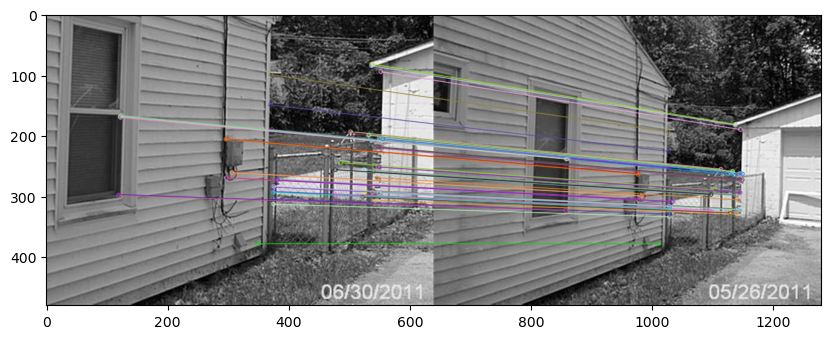

MatchRatio:0.6299559471365639


In [11]:
show_matches("data/near_dup/wo0001/wo0001003_1.jpg", "data/near_dup/wo0002/wo0002003_1.jpg")

In [12]:
import itertools as it

base_path = "data/near_dup/"

# Initialize the ORB detector
orb = cv2.ORB_create()
# Create a Brute Force Matcher
bf = cv2.BFMatcher(cv2.NORM_HAMMING, crossCheck=True)

image_data = []    

for folder_name in os.listdir(base_path):
    folder_path = os.path.join(base_path, folder_name)
    if not os.path.isdir(folder_path):
        continue
    for img_file in os.listdir(folder_path):
        file_name = os.path.join(folder_path, img_file)
        img = cv2.imread(os.path.join(folder_path, img_file), cv2.IMREAD_GRAYSCALE)
        kp, des = orb.detectAndCompute(img, None)
        image_data.append({
            'folder': folder_name,
            'file': img_file,
            'file_name': file_name,
            'image': img,
            'keypoints': kp,
            'descriptors': des
        })

In [13]:
len(image_data)

73

In [14]:
matched_images = []

for d1, d2 in it.combinations(image_data,2):
    matches = bf.match(d1['descriptors'], d2['descriptors'])
#     matches = sorted(matches, key=lambda x: x.distance)
    match_in_dist = sum((1 if m.distance < max_dist else 0 for m in matches))
    if match_in_dist >= min_match_count:
        matched_images.append((d1, d2, matches))

In [15]:
len(matched_images)

12

Matching Distances: [6.0, 9.0, 10.0, 10.0, 10.0, 10.0, 11.0, 11.0, 12.0, 13.0, 13.0, 13.0, 13.0, 13.0, 13.0, 14.0, 14.0, 14.0, 14.0, 14.0, 14.0, 14.0, 15.0, 15.0, 15.0, 15.0, 15.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 17.0, 17.0, 17.0, 17.0, 17.0, 17.0, 17.0, 17.0, 18.0, 18.0, 18.0, 18.0, 18.0, 18.0, 19.0, 19.0, 19.0, 19.0, 19.0, 19.0, 19.0, 19.0, 19.0, 19.0, 19.0, 20.0, 20.0]


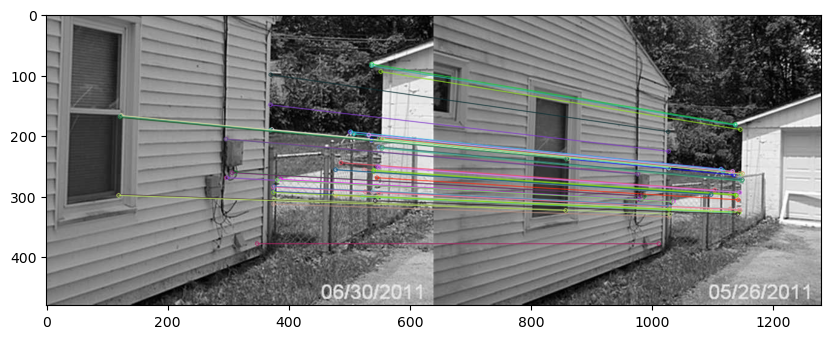

MatchRatio:0.6299559471365639


In [16]:
d1, d2, _ = matched_images[0]
show_matches(d1['file_name'], d2['file_name'])

Matching Distances: [5.0, 7.0, 8.0, 9.0, 9.0, 10.0, 11.0, 11.0, 11.0, 11.0, 12.0, 12.0, 12.0, 12.0, 12.0, 13.0, 13.0, 14.0, 14.0, 14.0, 14.0, 15.0, 15.0, 15.0, 15.0, 16.0, 16.0, 16.0, 16.0, 16.0, 17.0, 17.0, 17.0, 17.0, 18.0, 18.0, 18.0, 18.0, 18.0, 18.0, 19.0, 19.0, 19.0, 19.0, 20.0, 20.0, 20.0, 20.0, 20.0, 20.0, 20.0, 20.0, 20.0, 20.0, 20.0, 21.0, 21.0, 21.0, 21.0, 21.0]


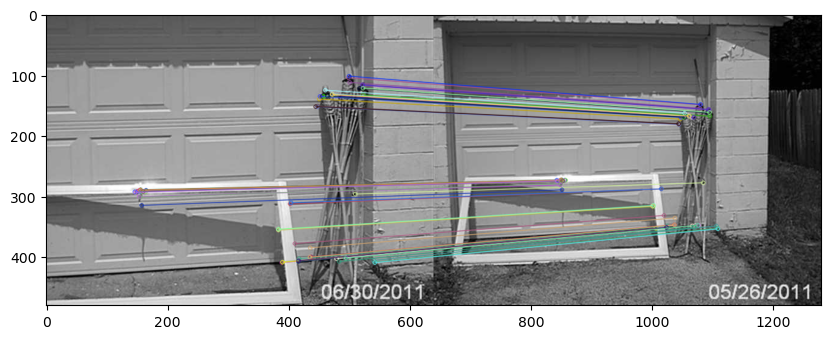

MatchRatio:0.5


In [17]:
d1, d2, _ = matched_images[1]
show_matches(d1['file_name'], d2['file_name'])

Matching Distances: [9.0, 10.0, 13.0, 16.0, 17.0, 17.0, 17.0, 18.0, 18.0, 22.0, 22.0, 22.0, 23.0, 23.0, 23.0, 23.0, 24.0, 24.0, 25.0, 25.0, 25.0, 25.0, 26.0, 26.0, 26.0, 26.0, 26.0, 26.0, 26.0, 26.0, 27.0, 27.0, 27.0, 27.0, 28.0, 28.0, 29.0, 29.0, 29.0, 29.0, 29.0, 29.0, 29.0, 29.0, 30.0, 31.0, 31.0, 31.0, 31.0, 31.0, 31.0, 31.0, 31.0, 32.0, 32.0, 33.0, 33.0, 33.0, 33.0, 33.0]


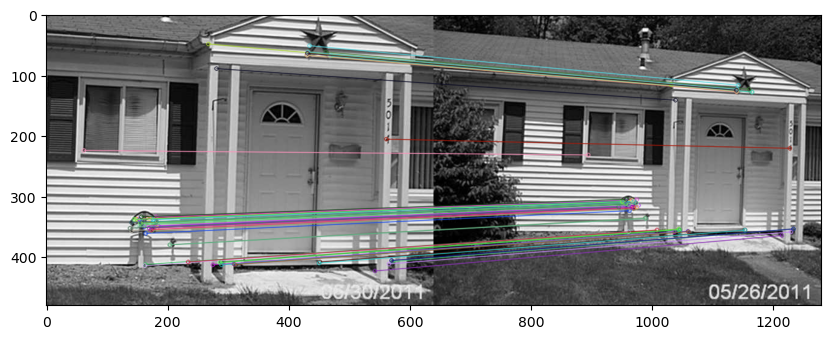

MatchRatio:0.21890547263681592


In [18]:
d1, d2, _ = matched_images[2]
show_matches(d1['file_name'], d2['file_name'])

In [19]:
d1, d2, matches = matched_images[2]
match_in_dist = [m for m in matches if m.distance <= max_dist]

In [20]:
src_pts = np.float32([d1['keypoints'][m.queryIdx].pt for m in match_in_dist]).reshape(-1, 1, 2)
dst_pts = np.float32([d2['keypoints'][m.trainIdx].pt for m in match_in_dist]).reshape(-1, 1, 2)
trans_mat, _ = cv2.estimateAffinePartial2D(src_pts, dst_pts)

In [21]:
scale_x = trans_mat[0,0]
scale_y = trans_mat[1,1]
shear_x = trans_mat[0,1]
shear_y = trans_mat[1,0]
trans_x = trans_mat[0,2]
trans_y = trans_mat[1,2]
rotation_angle_rad = -np.arctan2(trans_mat[1, 0], trans_mat[0, 0])
rotation_angle_deg = np.degrees(rotation_angle_rad)
print(f'Scale: {scale_x:.2f}, {scale_y:.2f}')
print(f'Shear: {shear_x:.2f}, {shear_y:.2f}')
print(f'Translation: {trans_x:.2f}, {trans_y:.2f}')
print(f'Rotation: {rotation_angle_deg}')

Scale: 0.67, 0.67
Shear: 0.00, -0.00
Translation: 213.14, 83.01
Rotation: 0.049791729995838044


In [22]:
def print_transforms(match):
    d1, d2, matches = match
    match_in_dist = [m for m in matches if m.distance <= max_dist]
    src_pts = np.float32([d1['keypoints'][m.queryIdx].pt for m in match_in_dist]).reshape(-1, 1, 2)
    dst_pts = np.float32([d2['keypoints'][m.trainIdx].pt for m in match_in_dist]).reshape(-1, 1, 2)
    trans_mat, _ = cv2.estimateAffinePartial2D(src_pts, dst_pts)
    
    scale_x = trans_mat[0,0]
    scale_y = trans_mat[1,1]
    shear_x = trans_mat[0,1]
    shear_y = trans_mat[1,0]
    trans_x = trans_mat[0,2]
    trans_y = trans_mat[1,2]
    rotation_angle_rad = -np.arctan2(trans_mat[1, 0], trans_mat[0, 0])
    rotation_angle_deg = np.degrees(rotation_angle_rad)
    print(f'Scale: {scale_x:.2f}, {scale_y:.2f}')
    print(f'Shear: {shear_x:.2f}, {shear_y:.2f}')
    print(f'Translation: {trans_x:.2f}, {trans_y:.2f}')
    print(f'Rotation: {rotation_angle_deg}')

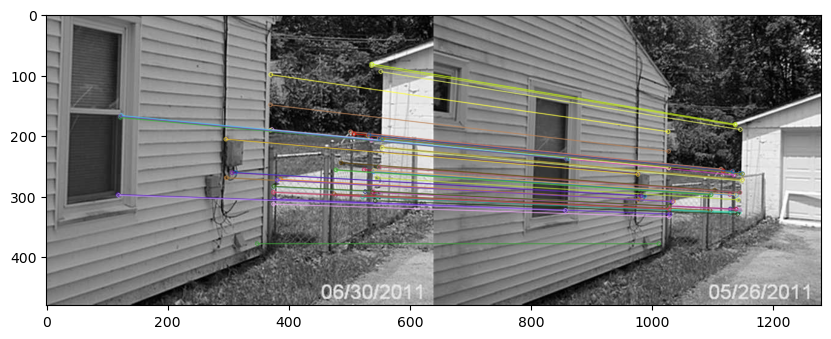

MatchRatio:0.6299559471365639
Scale: 0.67, 0.67
Shear: -0.00, 0.00
Translation: 139.72, 125.69
Rotation: -0.13313623398293745


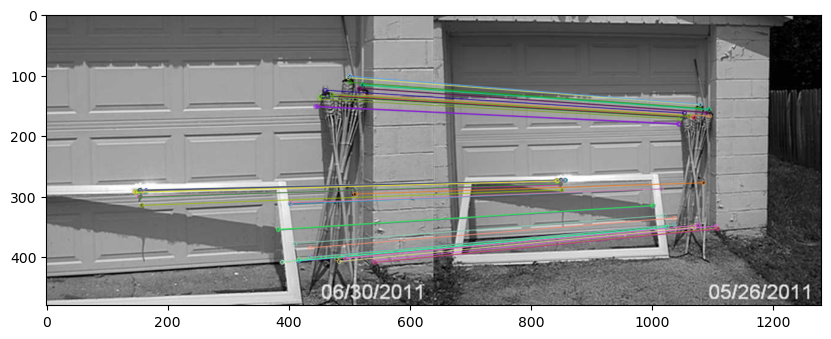

MatchRatio:0.5
Scale: 0.67, 0.67
Shear: 0.00, -0.00
Translation: 106.05, 79.54
Rotation: 0.01673428623611174


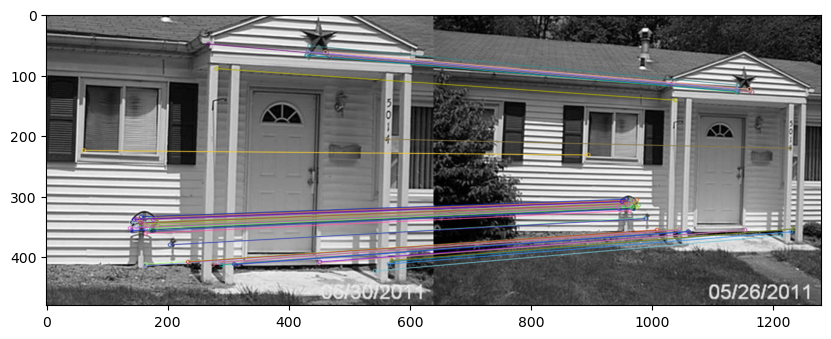

MatchRatio:0.21890547263681592
Scale: 0.67, 0.67
Shear: 0.00, -0.00
Translation: 213.14, 83.01
Rotation: 0.049791729995838044


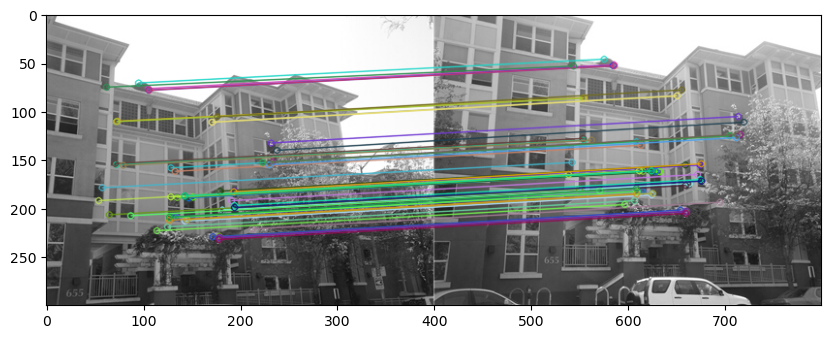

MatchRatio:0.22535211267605634
Scale: 0.99, 0.99
Shear: 0.01, -0.01
Translation: 80.91, -23.07
Rotation: 0.7493783627089794


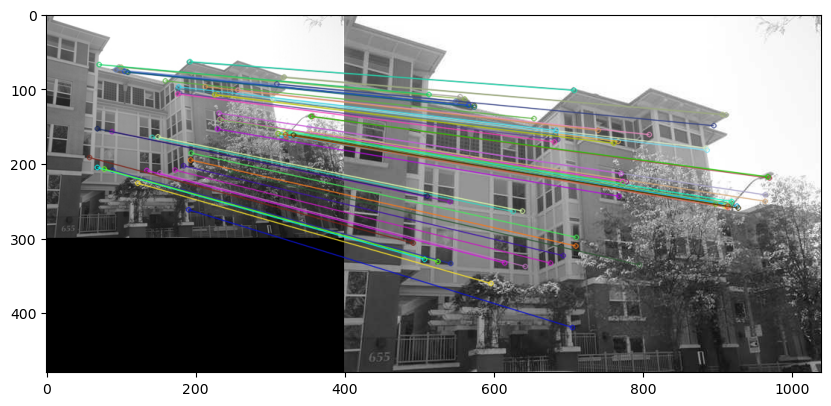

MatchRatio:0.39903846153846156
Scale: 1.60, 1.60
Shear: -0.00, 0.00
Translation: 0.35, -0.86
Rotation: -0.08723139448490576


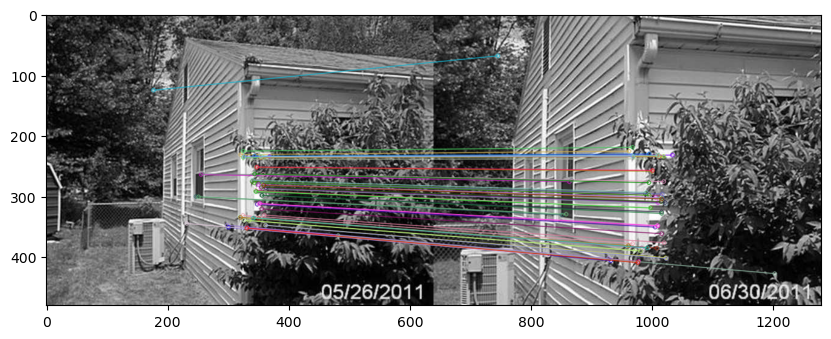

MatchRatio:0.5
Scale: 1.50, 1.50
Shear: 0.00, -0.00
Translation: -159.79, -119.12
Rotation: 0.03329547495410498


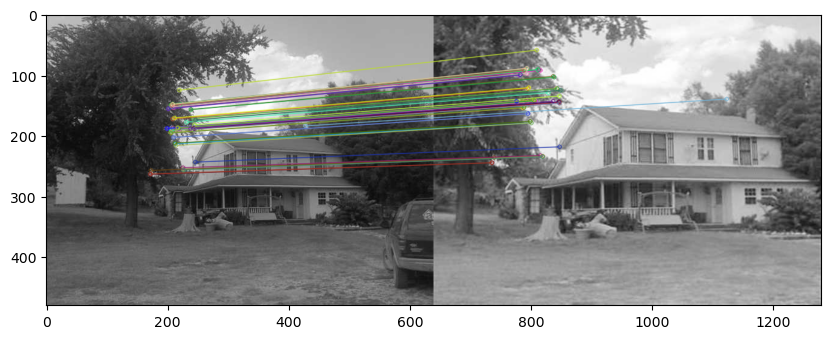

MatchRatio:0.3184713375796178
Scale: 1.35, 1.35
Shear: 0.04, -0.04
Translation: -134.95, -101.76
Rotation: 1.559536311250003


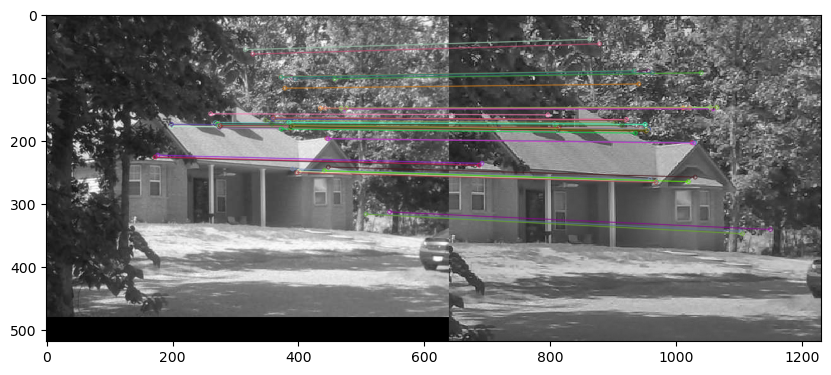

MatchRatio:0.36363636363636365
Scale: 1.25, 1.25
Shear: -0.01, 0.01
Translation: -168.37, -41.21
Rotation: -0.36639780711176934


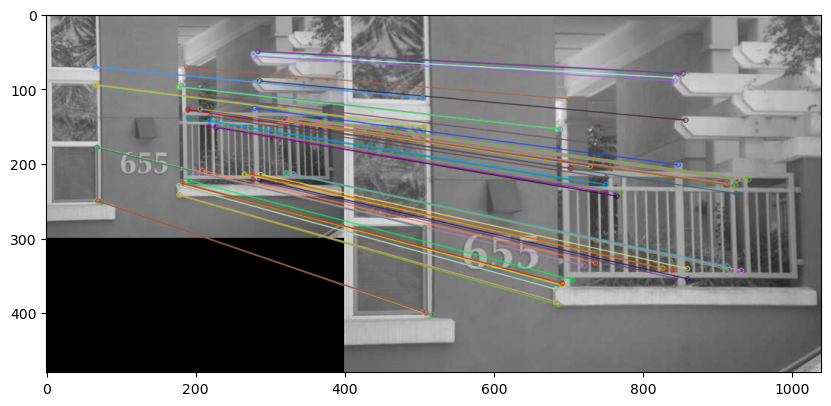

MatchRatio:0.3395348837209302
Scale: 1.60, 1.60
Shear: 0.00, -0.00
Translation: -0.15, -0.29
Rotation: 0.015643405613862515


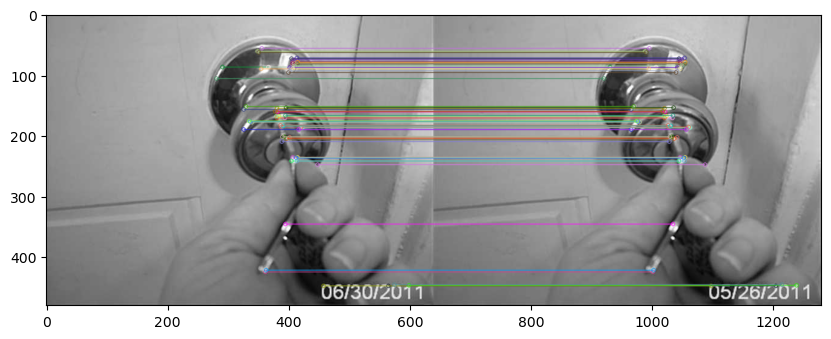

MatchRatio:0.9797979797979798
Scale: 1.00, 1.00
Shear: -0.00, 0.00
Translation: 0.00, 0.00
Rotation: -0.0


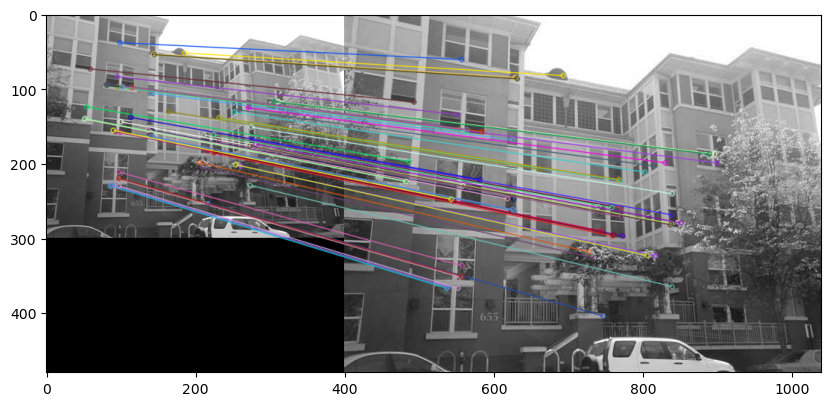

MatchRatio:0.3401015228426396
Scale: 1.60, 1.60
Shear: -0.00, 0.00
Translation: 0.30, -0.34
Rotation: -0.0723379757241175


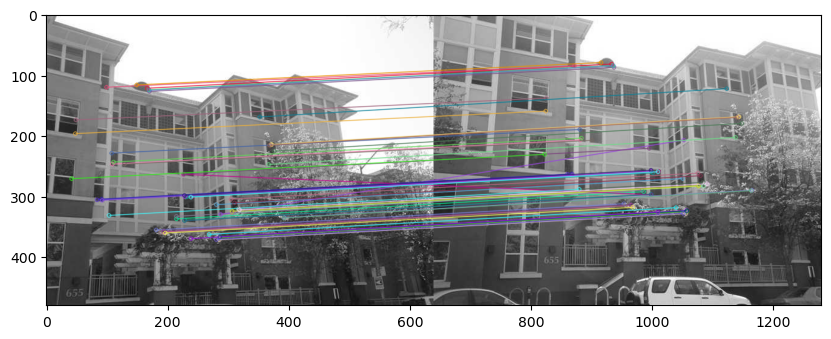

MatchRatio:0.2523809523809524
Scale: 1.00, 1.00
Shear: 0.01, -0.01
Translation: 127.68, -41.63
Rotation: 0.44693222582201664


In [23]:
for m in matched_images:
    d1, d2, _ = m
    show_matches(d1['file_name'], d2['file_name'], print_distances=False)
    print_transforms(m)